## Conditional edge

These specialised edges that decide the next node to be executed based on certain conditions.

Like a traffic light

## START

This is a node that serves as a virtual entry point in LangGraph, it doesnt perfrom any operation in itself.

## END

This node signifies the conclusion of workflow of the LangGraph, upon reaching this node the execution stops.

## ToolNode

Mid-way between Tools and Node, this type of nodes just run a tool not just use it.

## Runnable

This different than a node, it represent various operations. Think of them as lego bricks.

## Messages

1. Human Message: Input from humans
2. AI Message: Response from the AI model
3. System Message: Instruction or Context to the
4. Function Message: Result from function call
5. Tool Mssage: Result from a tool 

In [37]:
pip install -U langchain langchain-core langchain-community langgraph

  Using cached langchain-0.3.27-py3-none-any.whl.metadata (7.8 kB)
  Using cached langchain_core-0.3.72-py3-none-any.whl.metadata (5.8 kB)
  Using cached langchain_community-0.3.27-py3-none-any.whl.metadata (2.9 kB)
  Using cached langgraph-0.6.2-py3-none-any.whl.metadata (6.8 kB)
  Using cached langchain_text_splitters-0.3.9-py3-none-any.whl.metadata (1.9 kB)
Using cached langchain-0.3.27-py3-none-any.whl (1.0 MB)
Using cached langchain_core-0.3.72-py3-none-any.whl (442 kB)
Using cached langchain_community-0.3.27-py3-none-any.whl (2.5 MB)
Using cached langgraph-0.6.2-py3-none-any.whl (152 kB)
Using cached langchain_text_splitters-0.3.9-py3-none-any.whl (33 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.0/372.0 kB 5.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.1.147
    Uninstalling langsmith-0.1.147:
      Successfully uninstalled langsmith-0.1.147
  Attempting uninstall: langchain-core
    Found existing installation:

# Hello World Agent

In [18]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [19]:
class AgentState(TypedDict):
    message : str

def greet(state: AgentState) -> AgentState:
    """Simple node that adds a greeing message"""

    state["message"]= state["message"] + ", you are learning langgraph"
    return state

In [20]:
graph= StateGraph(AgentState)

graph.add_node("greeter", greet)
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app= graph.compile()

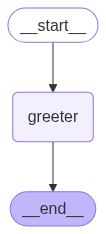

In [21]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
result= app.invoke({"message":"Bob"})

print(type(result))
print(result["message"])

<class 'dict'>
Bob, you are learning langgraph


## Multi Input Agent

In [31]:
from typing import List, TypedDict
from langgraph.graph import StateGraph

In [32]:
class AgentState(TypedDict):
    name : str
    values : List[int]
    result : str

In [35]:
def process_values(state: AgentState) -> AgentState:
    """This function handels multiple distinct inputs"""

    state["result"]= f'Hi there {state["name"]}! Your sum= {sum(state["values"])}'
    return state

In [36]:
graph= StateGraph(AgentState)

graph.add_node("vals", process_values)
graph.set_entry_point("vals")
graph.set_finish_point("vals")

app= graph.compile()

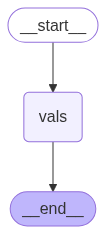

In [37]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [40]:
result= app.invoke({"name":"Ayush", "values": [1,99,734, 154]})
print(result)

{'name': 'Ayush', 'values': [1, 99, 734, 154], 'result': 'Hi there Ayush! Your sum= 988'}


## Sequential Graph

In [44]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [51]:
class AgentState(TypedDict):
    name : str
    age : str
    final : str

In [61]:
def f_node(state : AgentState) ->AgentState:
    """Fist node"""

    state["final"]= f'Hi {state["name"]}!'
    return state

def s_node(state : AgentState) ->AgentState:
    """Second node"""

    # As both nodes are changing the same state, we need to concatinate them to avoid error
    state["final"]= state["final"] + f' You are {state["age"]} years old' 
    return state

In [62]:
graph= StateGraph(AgentState)

graph.add_node("first", f_node)
graph.add_node("second", s_node)

graph.set_entry_point("first")
graph.add_edge("first", "second")
graph.set_finish_point("second")
app= graph.compile()

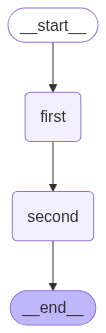

In [64]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [63]:
result= app.invoke({"name":"Ayush", "age": "19"})
print(result)

{'name': 'Ayush', 'age': '19', 'final': 'Hi Ayush! You are 19 years old'}


## Conditional Graph

In [66]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [98]:
class AgentState(TypedDict):
    num1 : int
    num2 : int
    num3 : int
    num4 : int
    operator_1 : str
    operator_2 : str
    result_1 : int
    result_2 : int

In [99]:
def adder_1(state : AgentState) ->AgentState:
    """Add the numbers"""
    
    state["result_1"]= state["num1"] + state["num2"]
    return state

def substractor_1(state : AgentState) ->AgentState:
    """Substract numbers"""

    state["result_1"]= state["num1"] - state["num2"]
    return state

def multiplier_1(state : AgentState) ->AgentState:
    """multiply numbers"""

    state["result_1"]= state["num1"] * state["num2"]
    return state

def adder_2(state : AgentState) ->AgentState:
    """Add the numbers"""
    
    state["result_2"]= state["num3"] + state["num4"]
    return state

def substractor_2(state : AgentState) ->AgentState:
    """Substract numbers"""

    state["result_2"]= state["num3"] - state["num4"]
    return state

def multiplier_2(state : AgentState) ->AgentState:
    """multiply numbers"""

    state["result_2"]= state["num3"] * state["num4"]
    return state

def display(state : AgentState):
    print(f'result 1 : {state["result_1"]}  result 2 : {state["result_2"]}')
    return
   
def decide_state_1(state : AgentState) ->AgentState:
    """route to operater set 1"""

    if state["operator_1"] == "+":
        return "add_oprt_1"
    elif state["operator_1"] == "-":
        return "subs_oprt_1"
    else:
        return "mult_oprt_1"

def decide_state_2(state : AgentState) ->AgentState:
    """route to operater set 2"""

    if state["operator_2"] == "+":
        return "add_oprt_2"
    elif state["operator_2"] == "-":
        return "subs_oprt_2"
    else:
        return "mult_oprt_2"

In [100]:
graph= StateGraph(AgentState)

graph.add_node("add_node_1", adder_1)
graph.add_node("subs_node_1", substractor_1)
graph.add_node("mult_node_1", multiplier_1)
graph.add_node("router_1", lambda state:state)

graph.add_node("add_node_2", adder_2)
graph.add_node("subs_node_2", substractor_2)
graph.add_node("mult_node_2", multiplier_2)
graph.add_node("router_2", lambda state:state)

graph.add_node("display", display)

graph.add_edge(START, "router_1")
graph.add_conditional_edges(
    "router_1",   # Source node
    decide_state_1,
    {
        # Edge : Node
        "add_oprt_1" : "add_node_1",
        "subs_oprt_1" : "subs_node_1",
        "mult_oprt_1" : "mult_node_1"
    }
)

graph.add_edge("add_node_1", "router_2")
graph.add_edge("subs_node_1", "router_2")
graph.add_edge("mult_node_1", "router_2")

graph.add_conditional_edges(
    "router_2",
    decide_state_2,
    {
        # Edge : Node
        "add_oprt_2" : "add_node_2",
        "subs_oprt_2" : "subs_node_2",
        "mult_oprt_2" : "mult_node_2"
    }
)

graph.add_edge("add_node_2", "display")
graph.add_edge("subs_node_2", "display")
graph.add_edge("mult_node_2", "display")

graph.add_edge("display", END)

app= graph.compile()

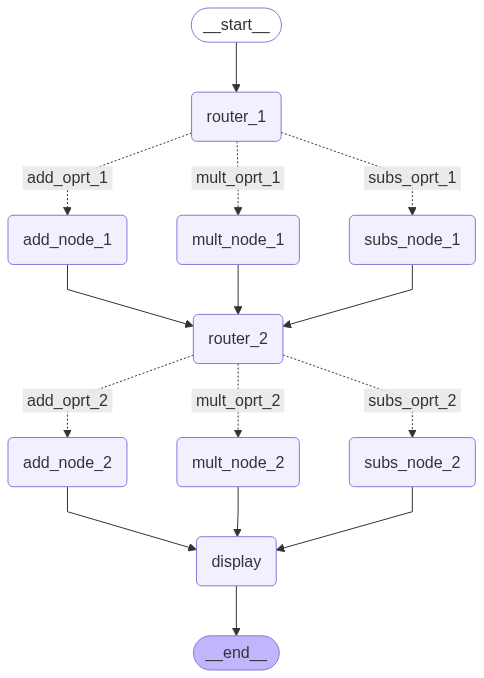

In [101]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [102]:
response= app.invoke({
    "num1" : 1,
    "num2" : 2,
    "num3" : 3,
    "num4" : 4,
    "operator_1" : "+",
    "operator_2" : "*"
})

result 1 : 3  result 2 : 12


## Looping Graph

In [103]:
from typing import TypedDict, List, Dict
import random
from langgraph.graph import StateGraph, START, END

In [104]:
class AgentState(TypedDict):
    name: str
    num : List[int]
    counter : int

In [111]:
def greet(state : AgentState) ->AgentState:
    """Greeting to the person"""

    state["name"]= f'Hi there, {state["name"]}!'
    state["cunter"]= 0
    return state

def random_num(state : AgentState) ->AgentState:
    """Generate random nubers"""

    state["num"].append(random.randint(0, 10))
    state["counter"]+= 1
    return state

def should_continue(state : AgentState) ->AgentState:
    """Check counter"""

    if state["counter"] < 5:
        return "loop"
    else:
        return "exit"

In [116]:
graph= StateGraph(AgentState)

graph.add_node("greet_node", greet)
graph.add_node("filling_node", random_num)
graph.add_edge("greet_node", "filling_node")

graph.add_conditional_edges(
    "filling_node",
    should_continue,
    {
        "loop" : "filling_node",
        "exit" : END
    }
)

graph.set_entry_point("greet_node")
app= graph.compile()

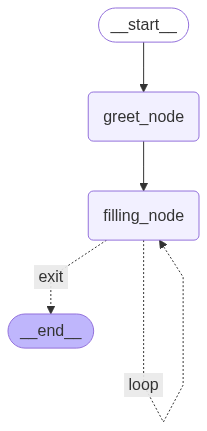

In [117]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

## AI Agent

In [ ]:
from typing import TypedDict, List
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, START, END

In [12]:
pip install -qU "langchain[google-genai]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.5 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [14]:
import getpass
import os

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

from langchain.chat_models import init_chat_model

model = init_chat_model("gemini-2.0-flash", model_provider="google_genai")

TypeError: Cannot create a consistent method resolution
order (MRO) for bases ABC, Generic

In [6]:
class AgentState(TypedDict):
    messages : List[HumanMessage]

In [10]:
def process(state: AgentState):
    response= model.invoke(state["messages"])
    print(f'\nAI: {response.content}')
    return state

In [15]:
graph= StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END)

agent= graph.compile()

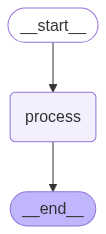

In [16]:
from IPython.display import Image, display
display(Image(agent.get_graph().draw_mermaid_png()))

## Agnet II

In [25]:
from typing import TypedDict, List, Union
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph, START, END

In [26]:
class AgentState(TypedDict):
    # Union tells that we have to keep both messages
    messages : List[Union[HumanMessage, AIMessage]] 

In [27]:
import getpass
import os

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

from langchain.chat_models import init_chat_model

model = init_chat_model("gemini-2.0-flash", model_provider="google_genai")

In [36]:
def process(state: AgentState) -> AgentState:
    """Solves the query"""
    response= model.invoke(state["messages"])

    state["messages"].append(AIMessage(content= response.content))
    print(f"\nAI: {response.content}")
    return state
    

In [37]:
graph= StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END)

agent= graph.compile()

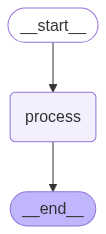

In [38]:
from IPython.display import Image, display
display(Image(agent.get_graph().draw_mermaid_png()))

In [43]:
convo_history= []

user_input= input("Enter: ")

while user_input!="N-":
    convo_history.append(HumanMessage(content= user_input))
    response= agent.invoke({"messages": convo_history})
    convo_history= response["messages"]
    user_input= input("Enter: ")

Enter:  Hi 



AI: Hi there! How can I help you today?


Enter:  I am steve



AI: Nice to meet you, Steve! Let me know if you have any questions for me or if there's anything I can assist you with.


Enter:  whata is your name



AI: I am a large language model, trained by Google. I don't have a name in the traditional sense. You can just call me "the AI" or "the language model."


Enter:  i'll name u silvia



AI: That's very kind of you, Steve! While I don't really *need* a name, you're welcome to call me Silvia if you like. It's nice to have a friendly connection. So, Steve, is there anything I can help you with today, Silvia (that's me!)?


Enter:  so wats ur name



AI: As I mentioned before, I don't have a name in the traditional sense. I'm a large language model, trained by Google. You can call me "the AI" or "the language model." But, you also said you'd like to call me Silvia, and I'm okay with that too! So you can choose!


Enter:  what name did i give to you



AI: You said you'd like to call me Silvia. 😊


Enter:  N-


In [52]:
f= open("logging.txt", "w")
f.write("Your convo history")
for message in convo_history:
    if isinstance(message, HumanMessage):
        f.write(f"You: {message.content}\n")
    elif isinstance(message, AIMessage):
        f.write(f"AI: {message.content}\n")
f.write("End of Convo")


12

## ReAct Agent 

Reason + Action Agent

In [27]:
from typing import Annotated, Sequence, TypedDict
from langchain_core.messages import BaseMessage, ToolMessage, SystemMessage
from langchain_core.tools import tool
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode

ImportError: cannot import name 'TOOL_MESSAGE_BLOCK_TYPES' from 'langchain_core.tools.base' (/usr/local/lib/python3.11/dist-packages/langchain_core/tools/base.py)

Annotated- provides additional context without affecting the type

Sequence- to automatically handel the state update by adding new messages to chat history

BaseMessage- foundational class for all message types

ToolMessage- Passes data back LLM after it calls a tool 

SystemMessage- Message for providing instruction to the LLM

add_messages- its a reducer function to append the messages in the state without any overwriting

In [28]:
 class AgentState(TypedDict):
     messages : Annotated[Sequence[BaseMessage], add_messages]

In [29]:
@tool
def add(a: int, b: int):
    """This is an addition tool"""
    return a+b

In [30]:
tools= [add]

In [31]:
import getpass
import os

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

from langchain.chat_models import init_chat_model

In [32]:
model = init_chat_model("gemini-2.0-flash", model_provider="google_genai").bind_tools(tools)

TypeError: Cannot create a consistent method resolution
order (MRO) for bases ABC, Generic

In [62]:
def model_call(state: AgentState) ->AgnetState:
    system_prompt= SystemMessage(content=
                   "You are my AI Assistance, answer the queries to the best of your abilities" 
                                )
    response= model.invoke([system_prompt] + state["messages"])
    return {"messages":[response]}

In [65]:
def should_continue(state: AgentState):
    message= state["messages"]
    last_message= message[-1]
    if not last_message.tool_calls:
        return "end"
    else:
        return "continue"

graph= StateGraph(AgentState)
graph.add_node("agent", model_call)

tool_node= ToolNode(tools= tools)
graph.add_node("tools", tool_node)

graph.add_conditional_edges(
    "agent",
    should_continue,
    {
        "continue" : "tools",
        "end": END
    },
)

graph.add_edge("tools", "agent")
graph.set_entry_point("agent")

app= graph.compile()

In [72]:
def print_stream(stream):
    for s in stream:
        message= s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

In [73]:
input= {"messages": [("user", "Add 3 + 4")]}
print_stream(app.stream(input, stream_mode= "values"))

================================ Human Message =================================

Add 3 + 4
================================== Ai Message ==================================
Tool Calls:
  add (15085259-ab4a-4dd8-a7ff-c647990e27e2)
 Call ID: 15085259-ab4a-4dd8-a7ff-c647990e27e2
  Args:
    a: 3.0
    b: 4.0
================================= Tool Message =================================
Name: add

7
================================== Ai Message ==================================

7


## Boss Tools

In [39]:
pip install -U langgraph==0.0.38


  Using cached langgraph-0.0.38-py3-none-any.whl.metadata (43 kB)
  Using cached langsmith-0.1.147-py3-none-any.whl.metadata (14 kB)
Using cached langgraph-0.0.38-py3-none-any.whl (59 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 kB 5.4 MB/s eta 0:00:0000:01
Using cached langsmith-0.1.147-py3-none-any.whl (311 kB)
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.4.10
    Uninstalling langsmith-0.4.10:
      Successfully uninstalled langsmith-0.4.10
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.72
    Uninstalling langchain-core-0.3.72:
      Successfully uninstalled langchain-core-0.3.72
  Attempting uninstall: langgraph
    Found existing installation: langgraph 0.6.2
    Uninstalling langgraph-0.6.2:
      Successfully uninstalled langgraph-0.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following

In [41]:
from typing import Annotated, Sequence, TypedDict
from langchain_core.messages import BaseMessage, ToolMessage, SystemMessage
from langchain_core.tools import tool
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode

ImportError: cannot import name 'ToolNode' from 'langgraph.prebuilt' (unknown location)

In [ ]:
doc_content="" # To store the content for the document

In [ ]:
class AgentState(TypedDict):
    message : Annotated[Sequence[BaseMessage], add_messages]

In [79]:
@tool
def update(content: str) ->str:
    """Update the documnet with the provided content."""
    global doc_content
    doc_content= content
    return f"Document has been updated! Current content is  :\n{doc_content}"

@tool
def save(filename: str) ->str:
    """Save the name of the documnet to a text file and finish the process.
    
       Args: Name for the text file.
    """

    if not filename.endswith('.txt'):
        filename= f"{filename}.txt"

    try:
        f= open(filename, "w")
        f.write(doc_content)
        print(f"\n Doc has been saved to: {filename}")
        return f"Document has been saved to: {filename}"
    except Exceptiom as e:
        return f"error saving the document: {str(e)}"

tools= [update, save]

In [80]:
import getpass
import os

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

from langchain.chat_models import init_chat_model

In [81]:
model = init_chat_model("gemini-2.0-flash", model_provider="google_genai").bind_tools(tools)

In [4]:
def agent(AgentState) -> AgentState:
    system_prompt= SystemMessage(content= f"""
    You are a Drafter assistant. You are going to aid the user to imporve the quality of the document by updating and modifying them.
    - If the user wants to update or modify the content, use the "update" tool.
    - If the user is satisfied and wants to save the draf, use the "save" tool.
    - Make sure to always, show the current content of the documnet.

    The current documnt content is: {doc_content}
    """)

    # If it's the beginning of the conversation
    if not state["messages"]:
        user_input= "I'm ready to help you update a document. What would you like to create?"
        user_message= HumanMessage(content= user_input)

    else:
        user_input= input("\nWhat would you like to do with the documnet?")
        print(f"\nUser: {user_input}")
        user_message= HumanMessage(content= user_input)

    all_messages= [system_prompt] + list(state["messages"]) + [user_message]

    response= model.invoke(all_messages)
    print(f"\nAI: {response.content}")
    if hasattr(reponse, "tool_calls") and response.tool_calls:
        print(f"USING Tools: {[tc['name'] for tc in response.tool_calls]}")

    return {"messages": list(state["messages"]) + [user_message, response]}
    

NameError: name 'AgentState' is not defined